# Time Series Analysis

## MLB Current Season Statistics by Team

This notebook explores a time series analysis of the MLB current season statistics dataset. The goal of this analysis is to identify trends in teams' performances over a given timespan and explore the effects of factors like the number of rest days between games.

### Notebook Setup

Import the necessary dependencies.

In [1]:
import pandas as pd

from utils.notebook_setup import setup_notebook_env, load_env_variables

Setup the notebook environment such that the root directory of the project can be accessed and the required environment variables are loaded to configure connection to the PostgreSQL database. 

In [2]:
setup_notebook_env()
load_env_variables()

Import dependencies from higher-level modules within the project that can now be accessed.

In [3]:
from shared.database import connect_to_db
from machine_learning.analysis.mlb_time_series import (
    TeamTimeSeriesAnalyzer,
    MomentumAnalyzer,
    RestAnalyzer
)
from machine_learning.analysis.mlb_visualization import TimeSeriesVisualizer

session = connect_to_db()

### Analysis

Read the data from the `mlb_teams` and `mlb_schedule` database tables into Pandas DataFrames for analysis.

In [4]:
teams_df = pd.read_sql_table('mlb_teams', session.bind)
schedule_df = pd.read_sql_table('mlb_schedule', session.bind)

Analyze the dataset and visualize the results.

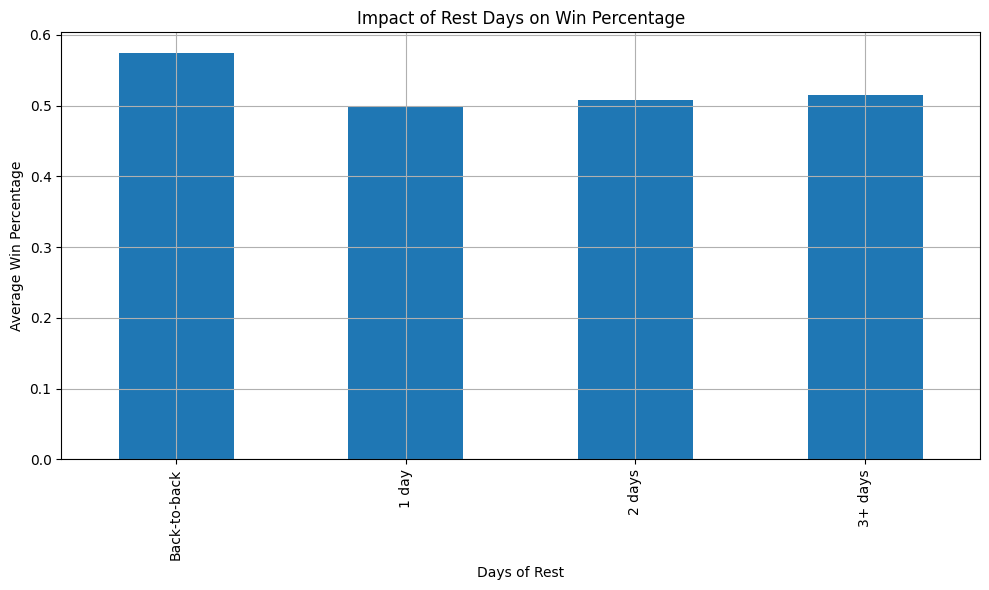

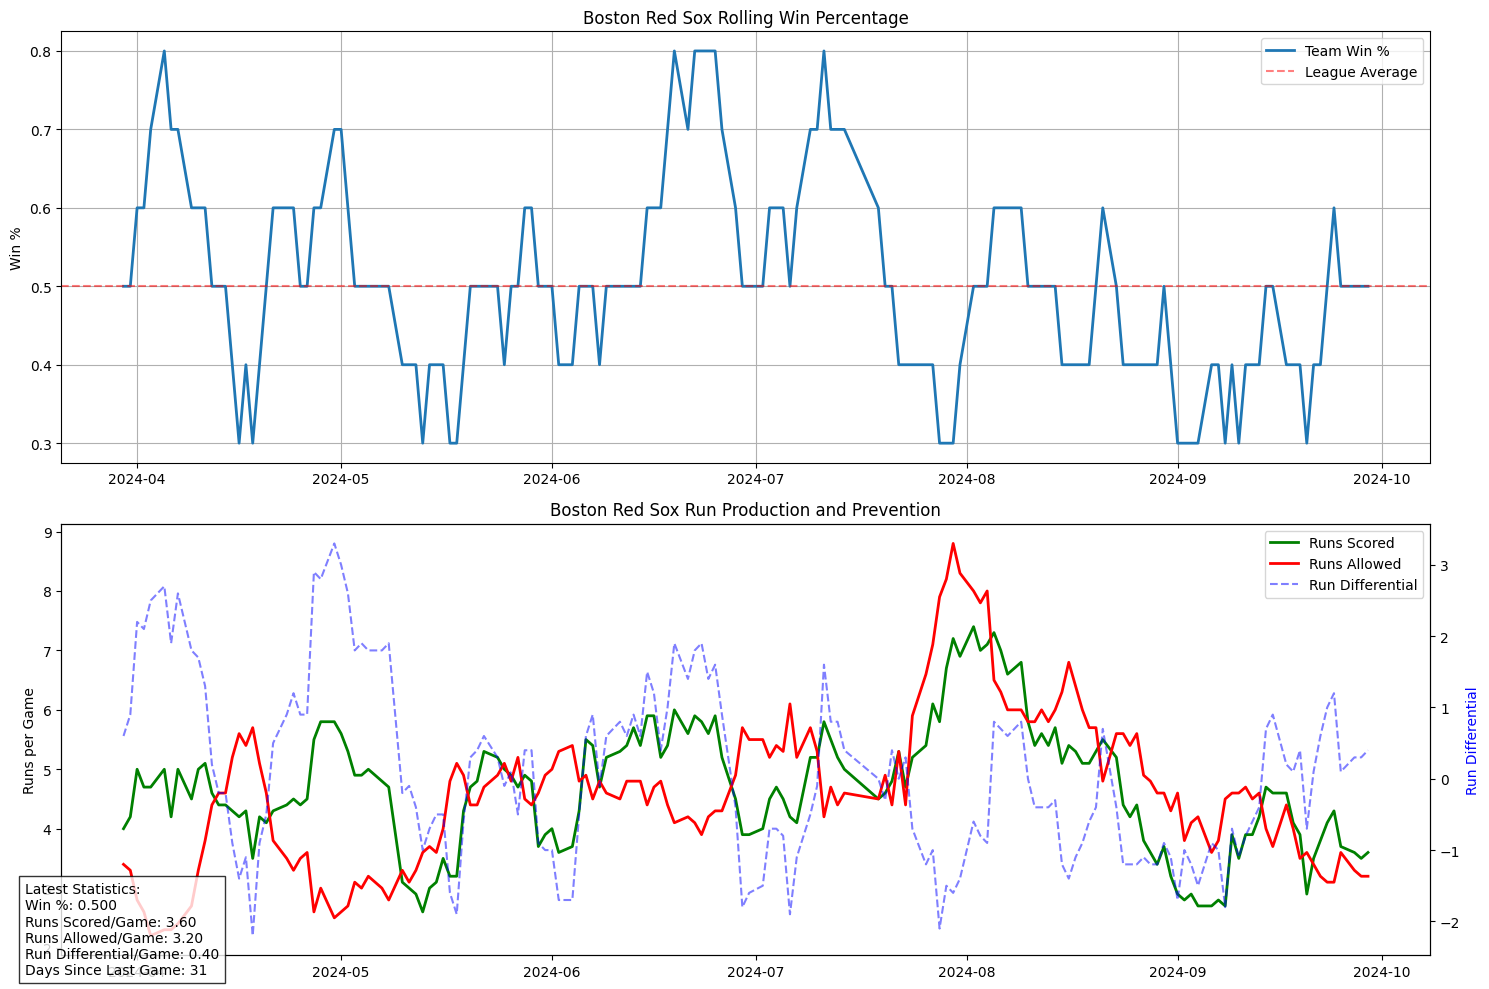


Team Performance Insights for Boston Red Sox:
- Team win percentage is exactly league average
(0.500 vs 0.500)
- Recent run differential trend (last 5 games): +0.46 runs/game
- Extended rest period: 31 days since last game


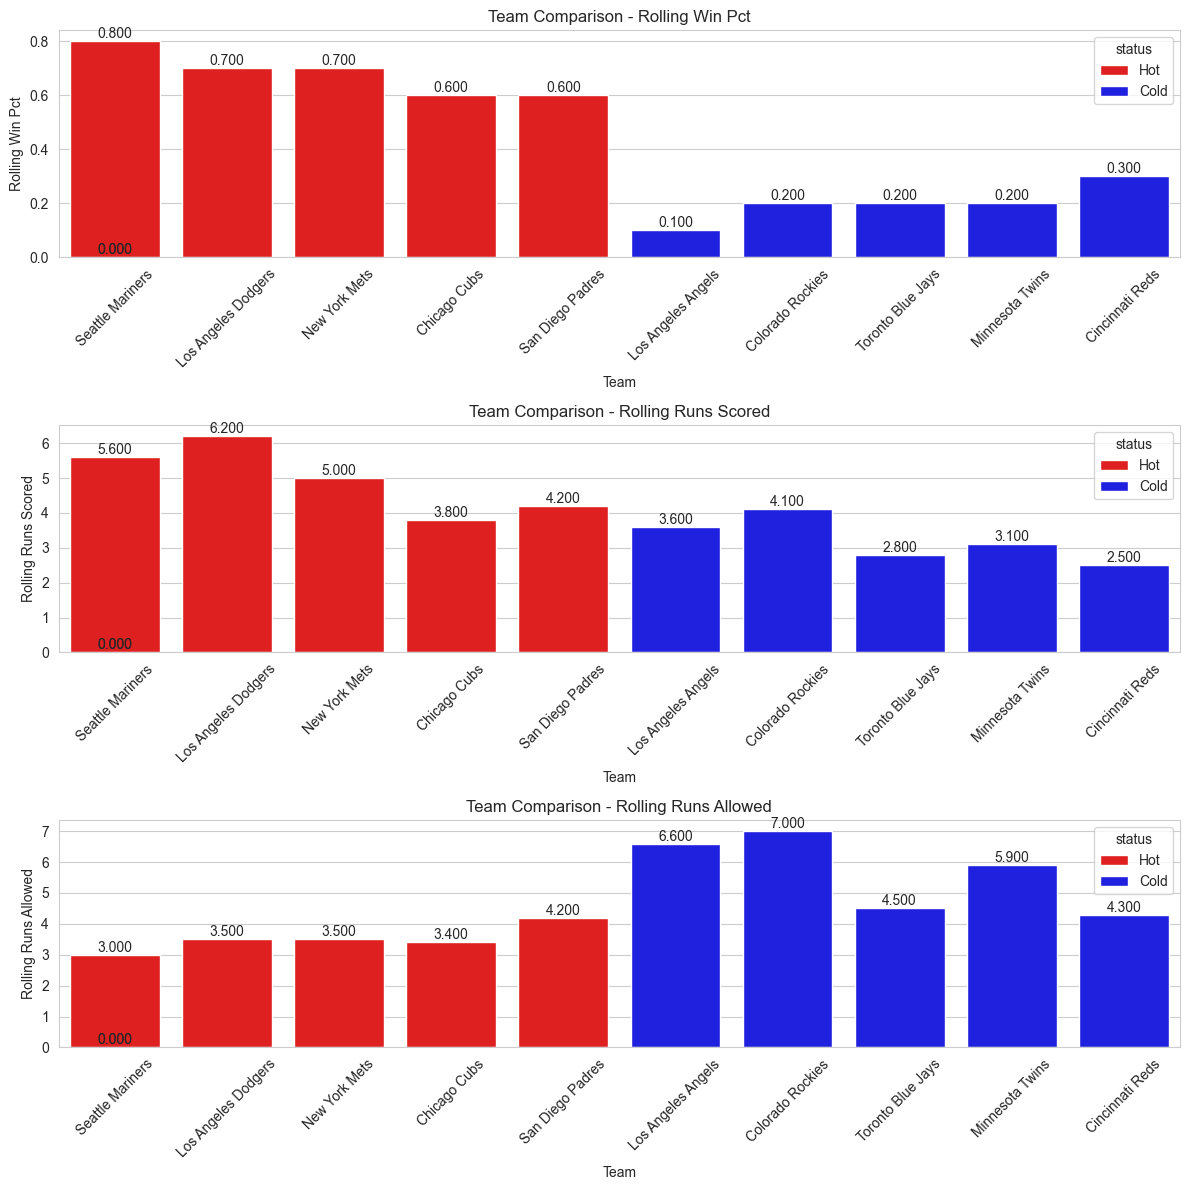


Hot Teams Summary:
               name  rolling_win_pct  rolling_runs_scored  rolling_runs_allowed
   Seattle Mariners            0.800                5.600                 3.000
Los Angeles Dodgers            0.700                6.200                 3.500
      New York Mets            0.700                5.000                 3.500
       Chicago Cubs            0.600                3.800                 3.400
   San Diego Padres            0.600                4.200                 4.200

Cold Teams Summary:
              name  rolling_win_pct  rolling_runs_scored  rolling_runs_allowed
Los Angeles Angels            0.100                3.600                 6.600
  Colorado Rockies            0.200                4.100                 7.000
 Toronto Blue Jays            0.200                2.800                 4.500
   Minnesota Twins            0.200                3.100                 5.900
   Cincinnati Reds            0.300                2.500                 4.300


In [5]:
# Initialize analyzers
team_analyzer = TeamTimeSeriesAnalyzer(window_size=10)
visualizer = TimeSeriesVisualizer()

# Calculate rolling statistics
rolling_stats = team_analyzer.calculate_rolling_stats(schedule_df, teams_df)

# Analyze rest impact
rest_impact = RestAnalyzer.calculate_rest_impact(rolling_stats)
visualizer.plot_rest_impact(rest_impact)

# Analyze specific team
visualizer.plot_team_momentum(rolling_stats, "Boston Red Sox", teams_df)

# Identify hot/cold teams
hot_teams, cold_teams = MomentumAnalyzer.identify_hot_cold_teams(rolling_stats, teams_df)
visualizer.plot_team_performance_comparison(hot_teams, cold_teams)